# La corrélation

La corrélation permet de mesurer la relation entre deux variables. Nous n'allons pas décrire les bases théoriques de la corrélation, nous assumons que c'est un concept déjà connu.

Par contre, nous allons regarder le côté pratique, avec les possibilités de calcul et de graphiques dans R, et de rappeler quelques limites importantes.

Nous allons nous concentrer ici sur le __coefficient de corrélation de Pearson__, qui est un des coeffecients possibles. Les prérequis pour l'utilisation du coeffecient de Person sont les suivants:

1. Nous sommes en présence d'un échantillon aléatoire pour deux variables liées
2. Les variables ont une relation linéaire l'une à l'autre
3. Les variables ont une échelle d'intervalle ou de ratio
4. Les variables suivent, au moins approximativement, une loi normale

Afin d'illustrer les calculs de la corrélation, nous utilisons un jeu de données de 38 variables démographiques, socio-professionnelles et socio-économiques pour les cantons de Zurich et Berne. Les variables sont expliquées dans le fichier [data-zh-be.xlsx](data-zh-be.xlsx), dans l'onglet _META_. Nous commençons par lire le contenu du fichier dans une variable `d`:

In [1]:
d = read.csv(file="data-zh-be.tsv", sep="\t")

Le calcul du coefficient de corrélation de Pearson est très simple avec la fonction __[cor()](http://stat.ethz.ch/R-manual/R-patched/library/stats/html/cor.html)__. Il suffit de donner les deux colonnes:

In [10]:
cor(d$ADCLIB, d$PFPHD)

[1] 0.8089527

En l'occurrence, nous avons calculé le coeffecient de corrélation de Pearson entre le nombre de personnes ayant une profession libérale et le nombre de personnes ayant fait une thèse de doctorat. La corrélation de 0.8 est à priori assez étonnante car très élevée. Par contre, si on sait que dans les professions libérales il y a notamment les médecins, et que les médecins ont souvent une thèse de doctorat, ceci parait moins surprenant...

Cet exemple montre plutôt un des dangers de l'étude de la corrélation. En effet, il faut être attentif aux problèmes suivants:

1. __Attention à ce qu'on compare!__ Dans l'exemple précédent, les professions libérales sont constituées en grande partie par les médecins, tout comme le nombre de personnes ayant une thèse de doctorat. La seule chose qu'on constate est donc qu'il y a un recoupement entre les deux variables, et ce recoupement est dû à la définition des variables.

2. __Une relation statistique ne signifie pas de cause à effet!__ Si deux variables montre une corrélation, positive ou négative, cela ne veut en aucun cas dire qu'il y a un lien cause à effet. Il se peut par exemple que deux variables comparées sont influencées par une troisième variable, non observée et inconnue. Du coup, on compare en quelque sorte cette troisième variable avec elle-même, ce qui donne nécessairement une corrélation élevée (et avec une manipulation simple, on peut même obtenir une corrélation négative élevée).

Le problème de la corrélation calculée ci-dessus est que nous n'avons aucune indication sur la __significativité du coefficient de corrélation__. Afin d'obtenir le coefficient de corrélation avec la significativité, nous utilisons la fonction __[cor.test()]()__. Cette fois nous utilisons le nombre de personnes ayant une formation professionnelle supérieure dans le secteur tertiaire et le nombre de personnes ayant divorcé:

In [17]:
cor.test(d$ADCEMP, d$PMSDIV)


	Pearson's product-moment correlation

data:  d$ADCEMP and d$PMSDIV
t = 8.4099, df = 408, p-value = 6.958e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2986380 0.4639454
sample estimates:
      cor 
0.3843685 


En plus du simple calcul du coefficient, nous avons effectué un test de significativité, avec les hypothèses suivantes:

$H_0$: La corrélation est égale à 0  
$H_1$: La corrélation est non nulle

Il s'agit en fait d'un test t. La valeur p est extrêment petite, nous pouvons donc rejeter l'hypothèse $H_0$ et conclure que le coefficient de corrélation est significativement différent de 0.

La corrélation de 0.38 n'est cependant toujours pas très élevé, mais il y a probablement, au moins en partie, une relation entre les deux variables. Les raisons de cette relation ne sont par contre pas claires et nécessiteraient des investigations plus approfondies.

Nous pouvons aussi faire une __comparaison visuelle__ de la relation entre les variables, avec la fonction __[plot()](http://stat.ethz.ch/R-manual/R-devel/library/graphics/html/plot.html)__:

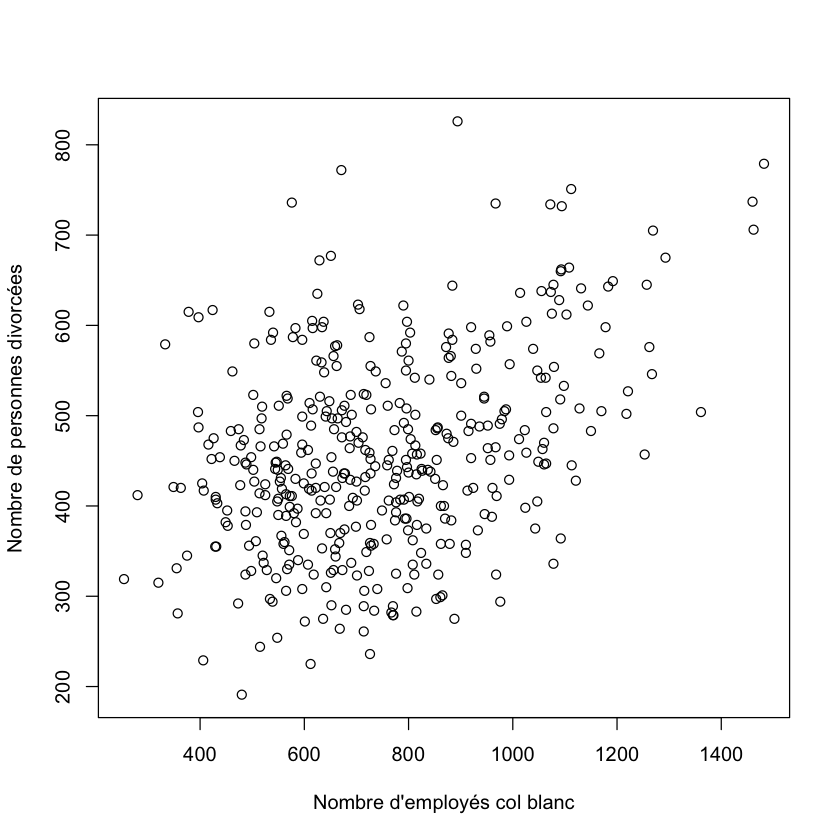

In [19]:
plot(d$ADCEMP, d$PMSDIV, xlab="Nombre d'employés col blanc", ylab="Nombre de personnes divorcées")

Nous pouvons en effet voir qu'il semble y avoir un faible lien entre les variables.

Nous pouvons aussi analyser les __relations entre plusieurs variables__. À nouveau, il est une bonne idée de faire une comparaison visuelle, à travers une matrice de nuages de points:

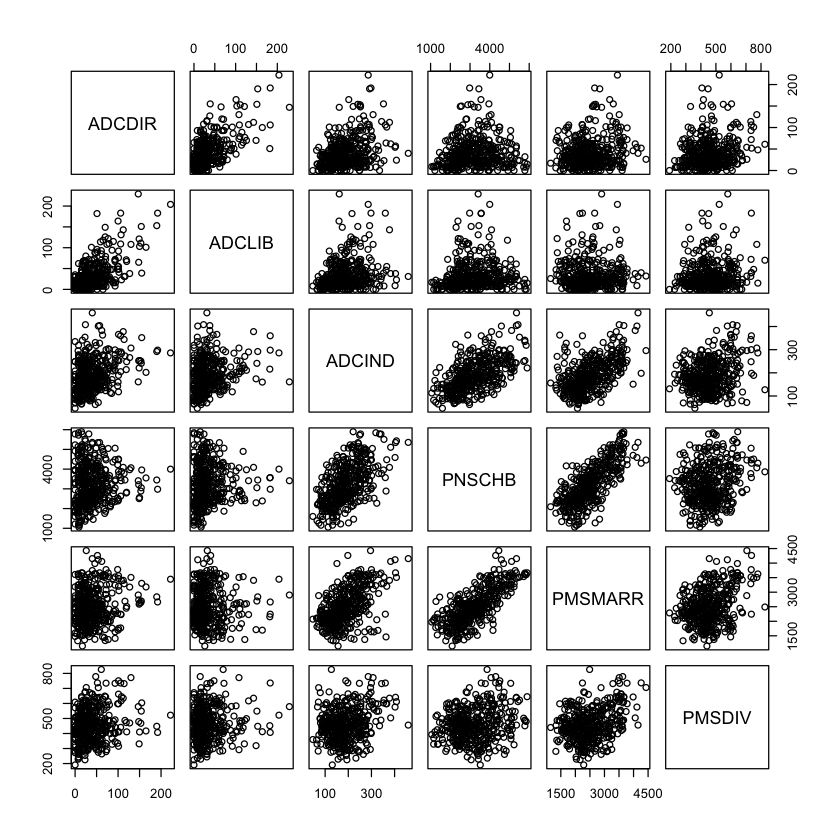

In [22]:
pairs(~ ADCDIR + ADCLIB + ADCIND + PNSCHB + PMSMARR + PMSDIV, data=d)

ce qui permet d'avoir une première idée sur des éventuelles liens entre variables. Puis il est possible de calculer une matrice de coefficients de corrélation avec __[cor()](http://stat.ethz.ch/R-manual/R-patched/library/stats/html/cor.html)__. Dans une première étape nous allons éliminer toutes les colonnes non numériques du data.frame `d` (notre tableau de données):

In [37]:
d_num = d[,-(1:3)]

Cette commande ne donne aucun retour si tout ce passe bien. Les crochets derrière `d` permettent de faire une sélection d'une partie des données. Ainsi

```R
d[1:4, 1:6]
```

permet de sélectionner les lignes 1 à 4 (`1:4`) et les colonnes 1 à 6 (`1:6`). Si on omet l'indication des lignes ou colonnes, tous les éléments sont pris. Ainsi, pour avoir les 3 premières colonnes, et toutes les lignes, on peut écrire

```R
d[, 1:3]
```

Finalement, au lieu d'indiquer les éléments qu'on veut garder, on peut indiquer quels éléments on veut écarter, en ajoutant un moins avant, du style:

```R
d[, -(1:3)]
```

ce qui garde tout sauf les 3 premières colonnes (et c'est exactement ce qu'on veut...).

Et par la suite, il suffit d'indiquer ce tableau de données modifié:

In [38]:
cor_mat = cor(d_num)

In [40]:
cor_mat

,ADCTOT,ADCDIR,ADCLIB,ADCIND,ADCFARM,ADCMGKN,ADCINT,ADCEMP,ADCWORK,ADCUNQ,⋯,PRUNKN,PFOBL,PFGEN,PFPROF,PFMAT,PFPRSF,PFPRSS,PFBAC,PFMAS,PFPHD
ADCTOT,1.00000000,0.26073626,0.19783071,0.65188243,0.1807199,0.43290044,0.882010008,0.648936456,0.371942623,0.09684589,⋯,0.246778082,0.20655858,0.358369301,0.560570007,0.574415796,0.66220764,0.52654821,0.353597276,0.28149717,0.161043582
ADCDIR,0.26073626,1.00000000,0.64360239,0.36992455,-0.1890052,0.50799410,0.161660531,-0.092736172,-0.354297212,-0.39329702,⋯,-0.079308989,-0.36911909,-0.302012863,-0.130522600,0.435568667,0.26804205,0.51582160,0.470750095,0.52319189,0.540534063
ADCLIB,0.19783071,0.64360239,1.00000000,0.25758674,-0.1681237,0.64230077,0.105780360,-0.299485337,-0.429085639,-0.47105676,⋯,-0.064628003,-0.45777891,-0.277731221,-0.298130996,0.503013060,0.10586510,0.48028159,0.548223217,0.67947834,0.808952660
ADCIND,0.65188243,0.36992455,0.25758674,1.00000000,0.3326610,0.23747629,0.515518563,0.320493998,0.304657701,-0.13952982,⋯,0.145381439,0.05953557,0.215750492,0.434191649,0.396501676,0.57857702,0.47638192,0.185091290,0.15944228,0.116160855
ADCFARM,0.18071991,-0.18900517,-0.16812370,0.33266103,1.0000000,-0.31763755,0.100922659,0.184014556,0.633786609,-0.06157850,⋯,0.144846767,0.20280088,0.452190167,0.453031946,-0.178698065,0.31891267,-0.14792842,-0.375973374,-0.33965461,-0.269963772
ADCMGKN,0.43290044,0.50799410,0.64230077,0.23747629,-0.3176376,1.00000000,0.334741115,-0.262360871,-0.556887289,-0.36715098,⋯,-0.072417991,-0.48054274,-0.411733948,-0.425696880,0.630963756,0.05504232,0.55359451,0.885393672,0.95767347,0.820926123
ADCINT,0.88201001,0.16166053,0.10578036,0.51551856,0.1009227,0.33474112,1.000000000,0.602855152,0.303450738,-0.01342701,⋯,0.182845810,0.09838320,0.283031245,0.531155748,0.496363950,0.73159166,0.55665299,0.277540786,0.18767924,0.065642532
ADCEMP,0.64893646,-0.09273617,-0.29948534,0.32049400,0.1840146,-0.26236087,0.602855152,1.000000000,0.624032630,0.25438132,⋯,0.183367508,0.40029760,0.546631989,0.871694624,0.131986870,0.62584873,0.18126321,-0.275494058,-0.41613789,-0.438333076
ADCWORK,0.37194262,-0.35429721,-0.42908564,0.30465770,0.6337866,-0.55688729,0.303450738,0.624032630,1.000000000,0.31161499,⋯,0.258803914,0.57238765,0.729618128,0.836747867,-0.202825192,0.41891222,-0.20385508,-0.576016420,-0.64057064,-0.584119176
ADCUNQ,0.09684589,-0.39329702,-0.47105676,-0.13952982,-0.0615785,-0.36715098,-0.013427011,0.254381318,0.311614989,1.00000000,⋯,0.355402169,0.85822214,0.409180733,0.186185067,-0.129039693,-0.24615954,-0.38117900,-0.206040945,-0.34536977,-0.440059270


On constatera que le tableau de la matrice des corrélations n'est pas affiché en complet. En effet, R connait un nombre maximal de colonnes et lignes à afficher (par défaut 60 lignes et 20 colonnes). Nous pouvons augmenter cette limite avec:

In [41]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

Et maintenant admirer la matrice complète:

In [42]:
cor_mat

,ADCTOT,ADCDIR,ADCLIB,ADCIND,ADCFARM,ADCMGKN,ADCINT,ADCEMP,ADCWORK,ADCUNQ,ADCAPP,ADCUNE,PNSCHB,PNSCHN,PNSFOR1,PNSFOR2,PMSSIN,PMSMARR,PMSWID,PMSDIV,PRPROT,PRCATH,PROCHR,PRJEW,PRMUSL,PROTH,PRNOREL,PRUNKN,PFOBL,PFGEN,PFPROF,PFMAT,PFPRSF,PFPRSS,PFBAC,PFMAS,PFPHD
ADCTOT,1.00000000,0.26073626,0.19783071,0.65188243,0.1807199,0.43290044,0.882010008,0.648936456,0.371942623,0.09684589,0.36671978,0.13735628,0.66158626,0.14953439,0.127177860,0.06435773,0.726575725,0.629785857,0.25141376,0.500351262,0.48245709,0.29624893,0.26066528,0.103364213,-0.077601210,0.043921043,0.495098585,0.246778082,0.20655858,0.358369301,0.560570007,0.574415796,0.66220764,0.52654821,0.353597276,0.28149717,0.161043582
ADCDIR,0.26073626,1.00000000,0.64360239,0.36992455,-0.1890052,0.50799410,0.161660531,-0.092736172,-0.354297212,-0.39329702,-0.23433516,-0.01925984,0.07688660,0.23675871,0.107044587,-0.06583635,0.113194067,0.180501582,-0.01870477,0.185137955,-0.09606528,0.34136779,-0.17510607,0.248541414,-0.247757398,-0.178471583,0.553903971,-0.079308989,-0.36911909,-0.302012863,-0.130522600,0.435568667,0.26804205,0.51582160,0.470750095,0.52319189,0.540534063
ADCLIB,0.19783071,0.64360239,1.00000000,0.25758674,-0.1681237,0.64230077,0.105780360,-0.299485337,-0.429085639,-0.47105676,-0.37409158,-0.06341181,0.08381125,0.08091491,0.090137424,-0.21165809,0.238517508,0.010173451,0.06176644,0.137875002,-0.04345827,0.17242840,-0.26526580,0.353649002,-0.331336386,-0.154055610,0.537338127,-0.064628003,-0.45777891,-0.277731221,-0.298130996,0.503013060,0.10586510,0.48028159,0.548223217,0.67947834,0.808952660
ADCIND,0.65188243,0.36992455,0.25758674,1.00000000,0.3326610,0.23747629,0.515518563,0.320493998,0.304657701,-0.13952982,0.30869024,-0.08601719,0.59196540,-0.07291532,-0.112256331,-0.13700539,0.345535725,0.547143965,0.27711439,0.252129737,0.45475252,0.12061587,0.05459473,0.057734101,-0.301695151,-0.264287169,0.331447431,0.145381439,0.05953557,0.215750492,0.434191649,0.396501676,0.57857702,0.47638192,0.185091290,0.15944228,0.116160855
ADCFARM,0.18071991,-0.18900517,-0.16812370,0.33266103,1.0000000,-0.31763755,0.100922659,0.184014556,0.633786609,-0.06157850,0.54222161,-0.35567414,0.55953993,-0.56255322,-0.492727681,-0.40056354,-0.038477201,0.362638220,0.27569780,-0.243470068,0.65555571,-0.49000586,0.07304730,-0.135755781,-0.370267208,-0.295524911,-0.384175203,0.144846767,0.20280088,0.452190167,0.453031946,-0.178698065,0.31891267,-0.14792842,-0.375973374,-0.33965461,-0.269963772
ADCMGKN,0.43290044,0.50799410,0.64230077,0.23747629,-0.3176376,1.00000000,0.334741115,-0.262360871,-0.556887289,-0.36715098,-0.49055572,0.16105446,-0.03114728,0.24897092,0.368545187,-0.06956619,0.700726104,-0.220659164,-0.19299973,0.223696502,-0.22389100,0.35855625,-0.27074528,0.457996954,-0.229764997,0.097696966,0.846804664,-0.072417991,-0.48054274,-0.411733948,-0.425696880,0.630963756,0.05504232,0.55359451,0.885393672,0.95767347,0.820926123
ADCINT,0.88201001,0.16166053,0.10578036,0.51551856,0.1009227,0.33474112,1.000000000,0.602855152,0.303450738,-0.01342701,0.34576666,0.04113366,0.63165834,0.07016664,0.001391831,0.01525370,0.623259872,0.551337372,0.19562393,0.413988827,0.47786266,0.19739566,0.21728009,0.023142509,-0.124949846,-0.010870709,0.380692134,0.182845810,0.09838320,0.283031245,0.531155748,0.496363950,0.73159166,0.55665299,0.277540786,0.18767924,0.065642532
ADCEMP,0.64893646,-0.09273617,-0.29948534,0.32049400,0.1840146,-0.26236087,0.602855152,1.000000000,0.624032630,0.25438132,0.64604894,0.01868107,0.61386512,0.06580588,-0.156914541,0.16247124,0.157600654,0.751404045,0.29650711,0.384368499,0.56173418,0.07975695,0.41704539,-0.258589696,0.122357824,-0.008217706,-0.095554273,0.183367508,0.40029760,0.546631989,0.871694624,0.131986870,0.62584873,0.18126321,-0.275494058,-0.41613789,-0.438333076
ADCWORK,0.37194262,-0.35429721,-0.42908564,0.30465770,0.6337866,-0.55688729,0.303450738,0.624032630,1.000000000,0.31161499,0.79302253,-0.11814102,0.65595747,-0.34600421,-0.370795207,-0.05662717,-0.025131385,0.65